In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [36]:
df = pd.read_csv('loan_sanction_test.csv')

In [37]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,LP001054,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
6,LP001055,Female,No,1,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban
7,LP001056,Male,Yes,2,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural
8,LP001059,Male,Yes,2,Graduate,NaN,13633,0,280.0,240.0,1.0,Urban
9,LP001067,Male,No,0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban


**Dataset shows applicant demographics, income, loan details, and property area.**

In [38]:
df.shape

(367, 12)

**367 rows × 12 columns → medium‑sized dataset.**

In [39]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


**Some missing values in categorical and numeric columns.**

In [41]:
df.isnull().sum()

,0
Loan_ID,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6


**LoanAmount (5), Loan_Amount_Term (6), Credit_History (29) missing.**

In [42]:
df.duplicated().sum()

np.int64(0)

In [43]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


**Applicant income highly skewed with large outliers.**

In [44]:
#copy data
df1 = df.copy()

In [45]:
### Fill Categorical Columns with Mode
df1['Gender'].fillna(df1['Gender'].mode()[0], inplace=True)
df1['Married'].fillna(df1['Married'].mode()[0], inplace=True)
df1['Dependents'].fillna(df1['Dependents'].mode()[0], inplace=True)
df1['Self_Employed'].fillna(df1['Self_Employed'].mode()[0], inplace=True)
df1['Credit_History'].fillna(df1['Credit_History'].mode()[0], inplace=True)
print(df1.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     6
Credit_History       0
Property_Area        0
dtype: int64


**Fill categorical with mode: All categorical missing values handled.**

In [46]:
## Fill Numerical Columns with Mean
df1['LoanAmount'].fillna(df1['LoanAmount'].mean(), inplace=True)
df1['Loan_Amount_Term'].fillna(df1['Loan_Amount_Term'].mean(), inplace=True)
print(df1.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


**Fill numeric with mean: LoanAmount and Loan_Amount_Term missing values filled.**

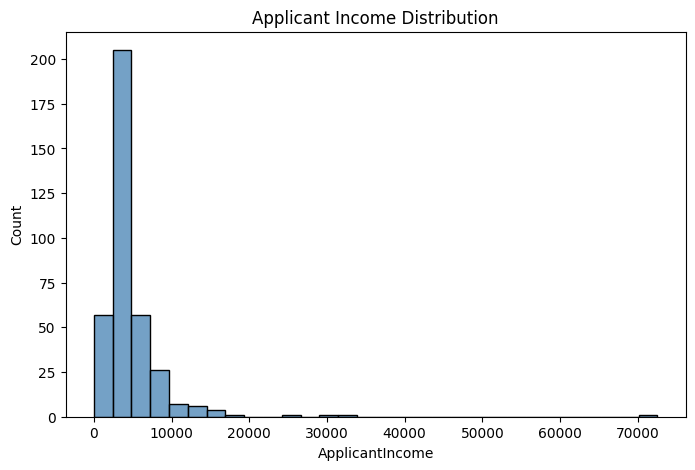

In [47]:
plt.figure(figsize=(8,5))
sns.histplot(df1['ApplicantIncome'],bins=30,color='steelblue')
plt.title('Applicant Income Distribution')
plt.show()

**Most applicants earn ₹2k–₹6k, few extreme outliers.**

In [48]:
#check outliers innumeric columns int,float
num_cols = df1.select_dtypes(include=['int64','float64']).columns
num_cols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [49]:
cat_cols = df1.select_dtypes(include=['object']).columns
cat_cols

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area'],
      dtype='object')

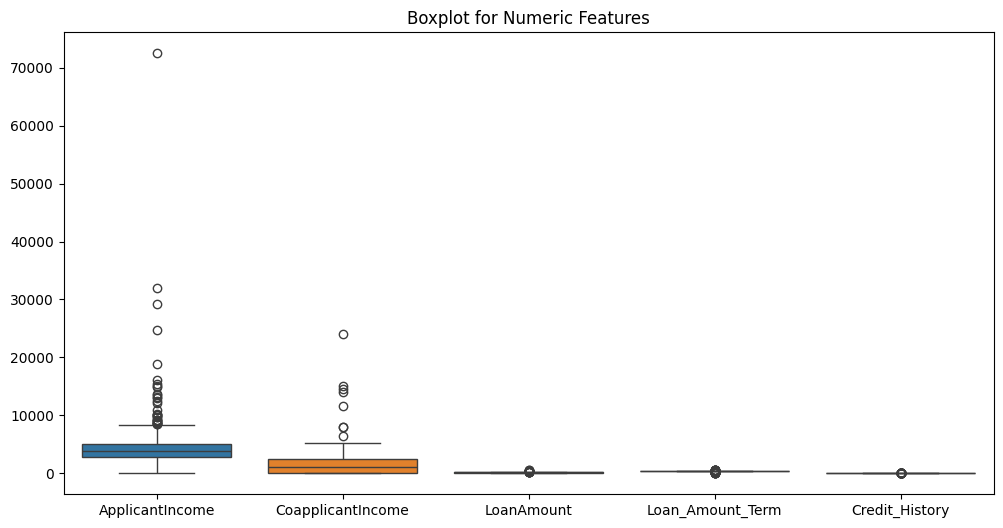

In [50]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df1[num_cols])
plt.title('Boxplot for Numeric Features')
plt.show()

**Outliers present in income and loan amount.**

In [51]:
num_cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount']
for col in num_cols:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df1[(df1[col] < lower_bound) | (df1[col] > upper_bound)]
    df1[col] = np.where(df1[col] > upper_bound, upper_bound,
                        np.where(df1[col] < lower_bound, lower_bound, df1[col]))
    print(f"{col}: {outliers.shape[0]} outliers")


ApplicantIncome: 32 outliers
CoapplicantIncome: 8 outliers
LoanAmount: 18 outliers


**32 ApplicantIncome, 8 CoapplicantIncome, 18 LoanAmount capped.**

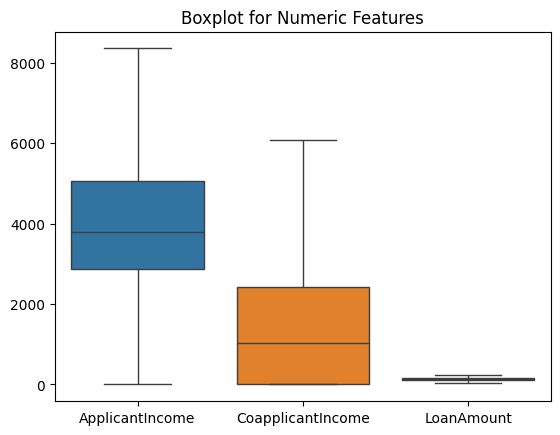

In [52]:
sns.boxplot(data=df1[num_cols])
plt.title('Boxplot for Numeric Features')
plt.show()


In [53]:
# find categorical column and numeric column
numeric_features = [feature for feature in df1.columns if df1[feature].dtype != 'O']
categorical_features = [feature for feature in df1.columns if df1[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))


We have 5 numerical features : ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

We have 7 categorical features : ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']


In [54]:
for col in categorical_features:
    print(df1[col].value_counts(normalize=True)*100)
    print('----------------')

Loan_ID
LP002989    0.27248
LP001015    0.27248
LP001022    0.27248
LP001031    0.27248
LP001035    0.27248
             ...   
LP001115    0.27248
LP001108    0.27248
LP001107    0.27248
LP001105    0.27248
LP001099    0.27248
Name: proportion, Length: 367, dtype: float64
----------------
Gender
Male      80.926431
Female    19.073569
Name: proportion, dtype: float64
----------------
Married
Yes    63.487738
No     36.512262
Name: proportion, dtype: float64
----------------
Dependents
0     57.220708
2     16.076294
1     15.803815
3+    10.899183
Name: proportion, dtype: float64
----------------
Education
Graduate        77.111717
Not Graduate    22.888283
Name: proportion, dtype: float64
----------------
Self_Employed
No     89.918256
Yes    10.081744
Name: proportion, dtype: float64
----------------
Property_Area
Urban        38.147139
Semiurban    31.607629
Rural        30.245232
Name: proportion, dtype: float64
----------------


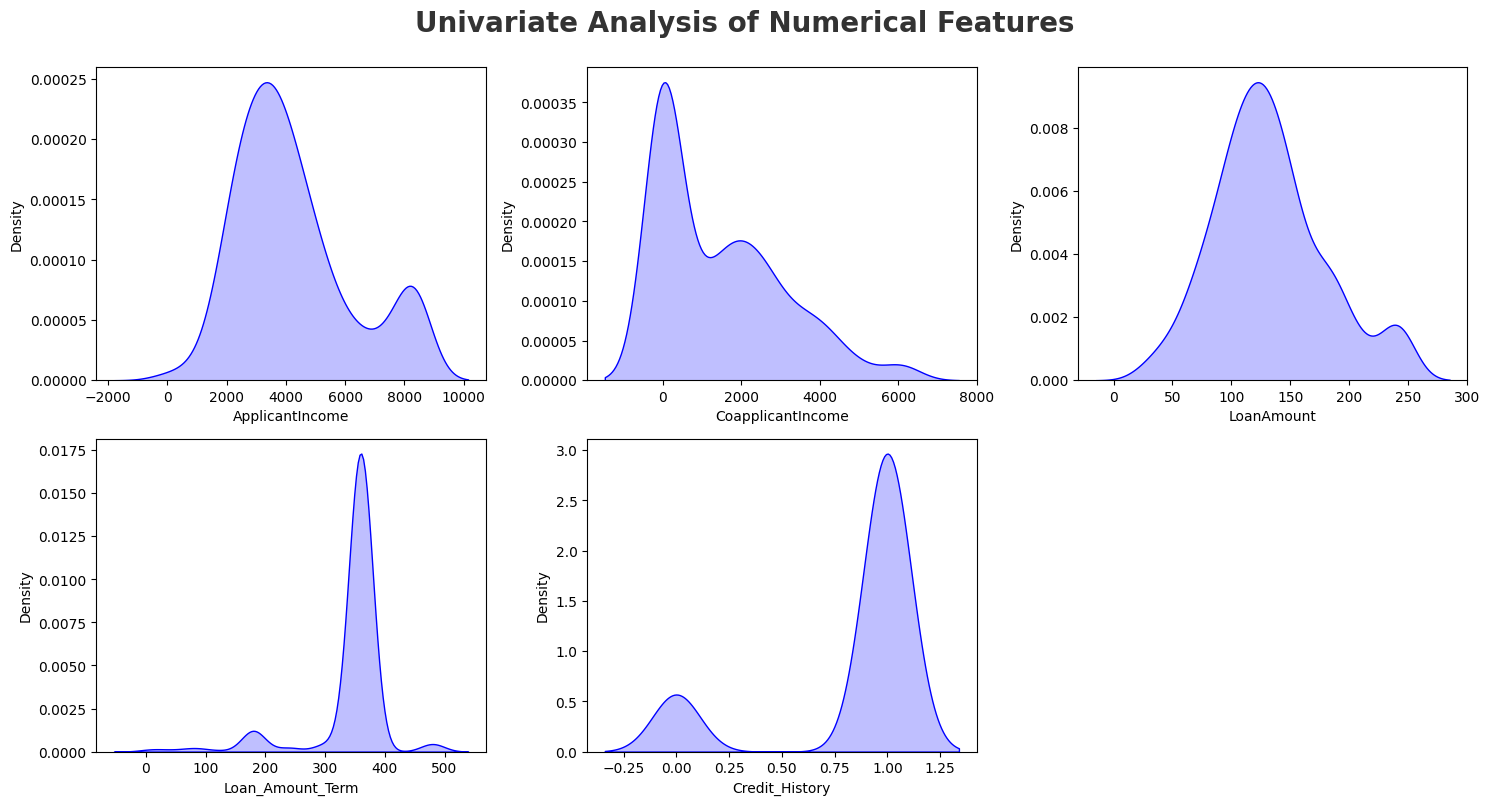

In [55]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold',alpha=0.8,y=1)
for i in range(0,len(numeric_features)):
    plt.subplot(4,3,i+1)
    sns.kdeplot(x=df1[numeric_features[i]],shade=True,color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

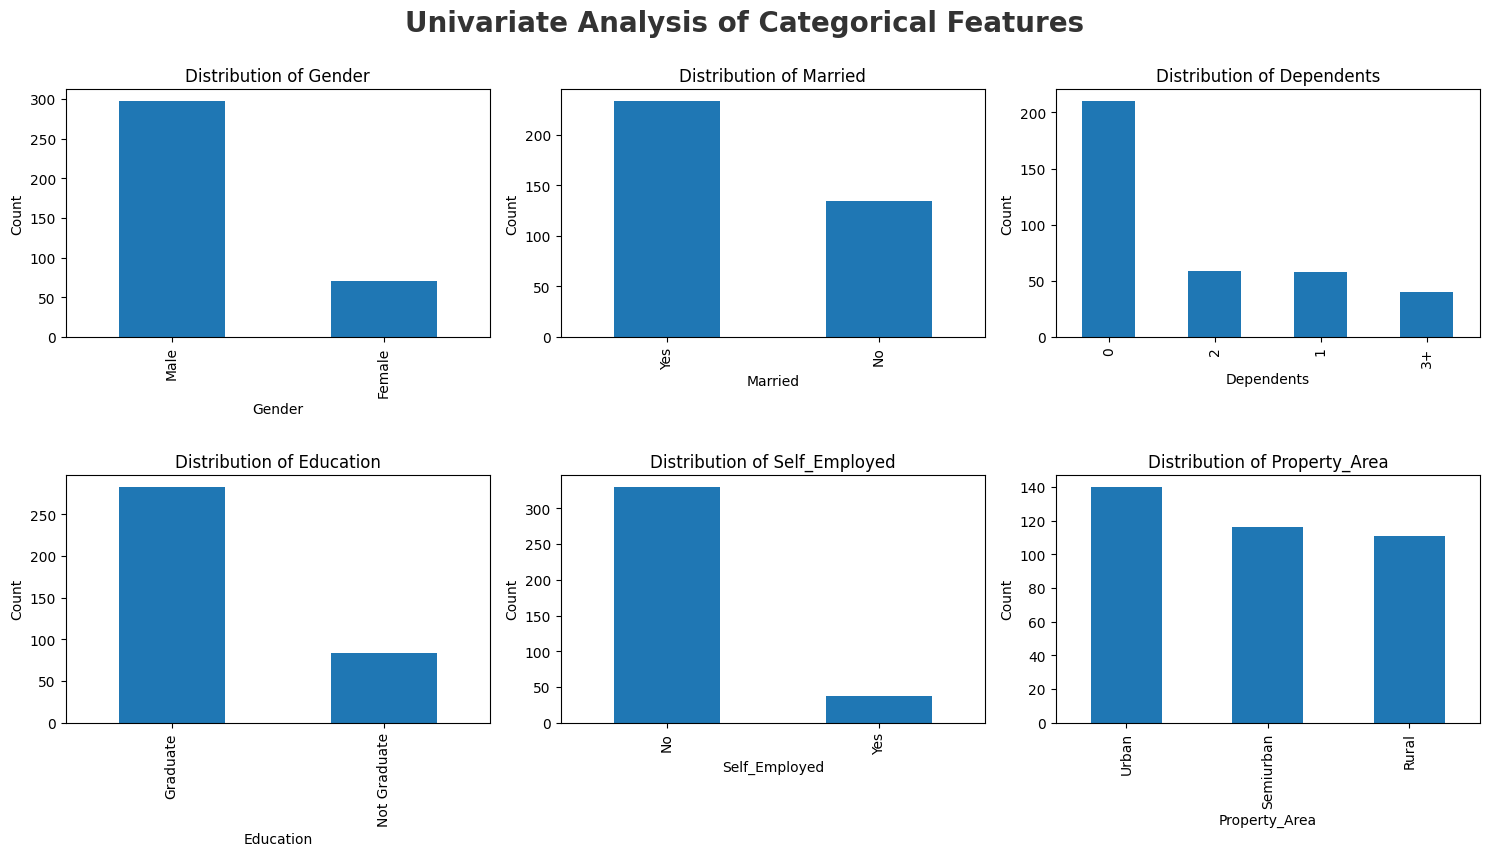

In [56]:
cat_cols = ['Gender', 'Married', 'Dependents',
            'Education', 'Self_Employed', 'Property_Area']

plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold',alpha=0.8,y=1)
for i, col in enumerate(cat_cols, 1):
    plt.subplot(4,3,i)
    df1[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

 **Majority male, married, graduates, urban residents.**

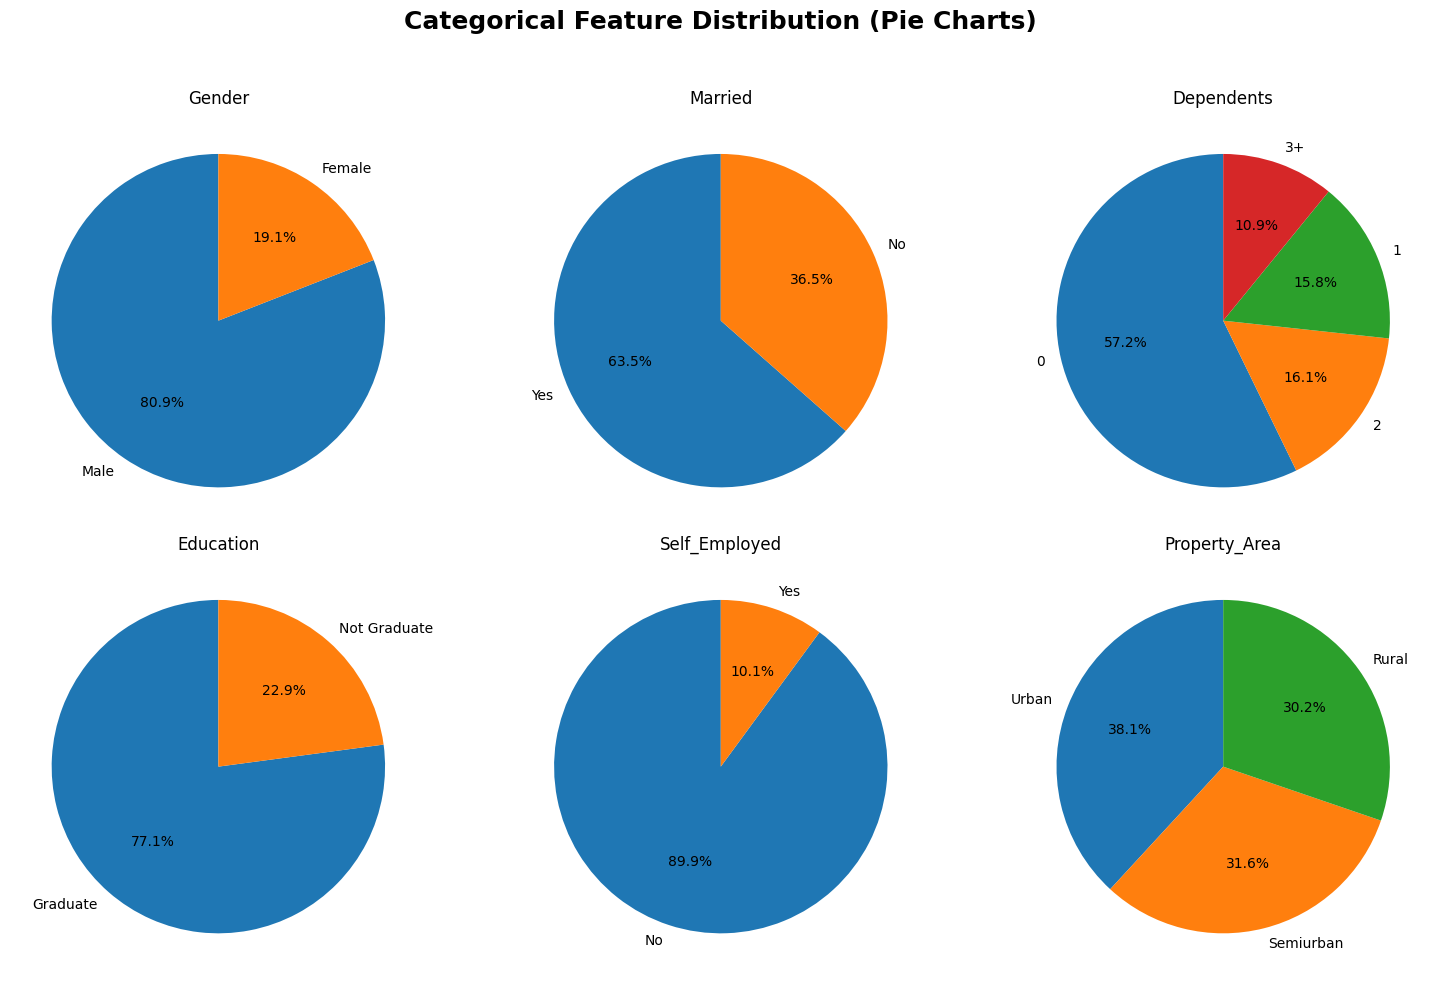

In [57]:
plt.figure(figsize=(15,10))
plt.suptitle('Categorical Feature Distribution (Pie Charts)',
             fontsize=18, fontweight='bold')

for i, col in enumerate(cat_cols, 1):
    plt.subplot(2,3,i)
    df1[col].value_counts().plot(
        kind='pie',
        autopct='%1.1f%%',
        startangle=90)
    plt.title(col)
    plt.ylabel('')   # remove y-label

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Urban (38%), Semiurban (32%), Rural (30%).**

# **Bivariate Analysis**

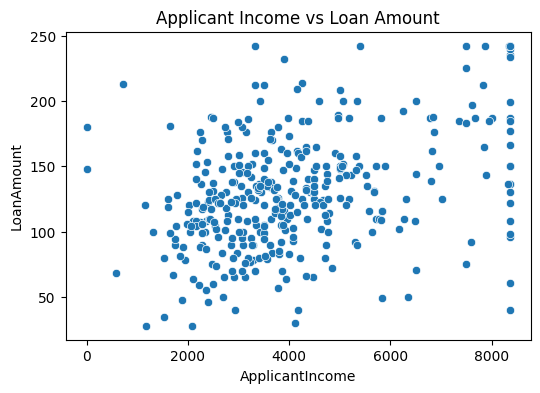

In [58]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df1['ApplicantIncome'],y=df1['LoanAmount'])
plt.title('Applicant Income vs Loan Amount')
plt.show()


**Higher income linked to larger loan requests.**

<Figure size 1500x1500 with 0 Axes>

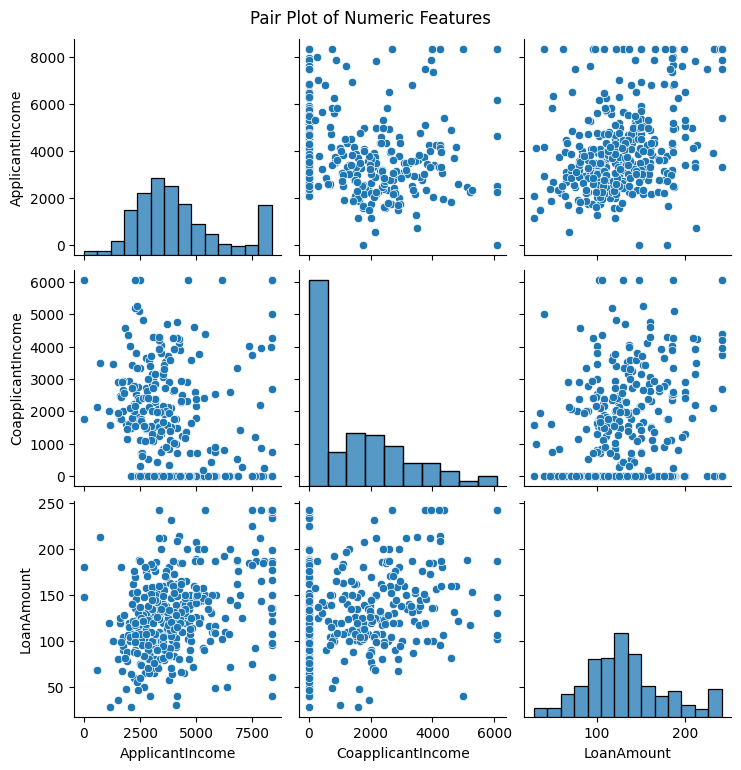

In [59]:
plt.figure(figsize=(15,15))
sns.pairplot(df1[num_cols],palette='Set1')
plt.suptitle("Pair Plot of Numeric Features", y=1.02)
plt.show()

**Applicant income moderately correlated with loan amount.**

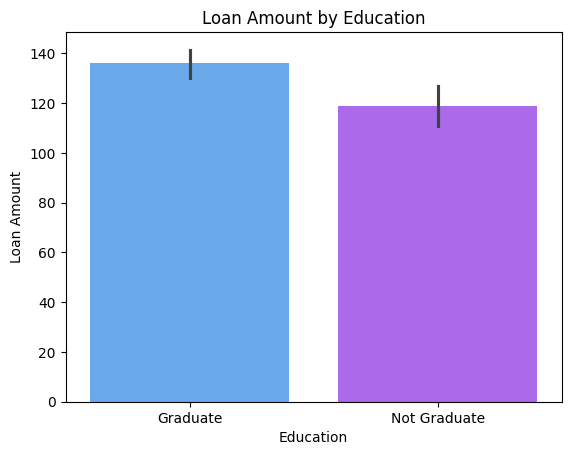

In [60]:
sns.barplot(x='Education', y='LoanAmount', data=df1,palette='cool')
plt.xlabel('Education')
plt.ylabel('Loan Amount')
plt.title("Loan Amount by Education")
plt.show()

**Graduates request slightly higher loans.**

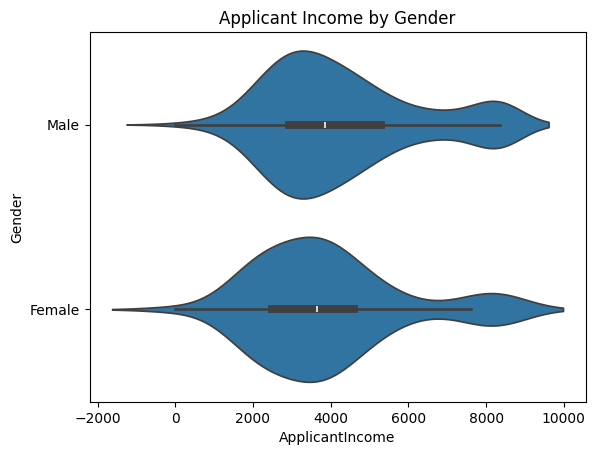

In [61]:
sns.violinplot(y='Gender', x='ApplicantIncome', data=df1)
plt.title("Applicant Income by Gender")
plt.show()

**Male incomes more spread than female.**

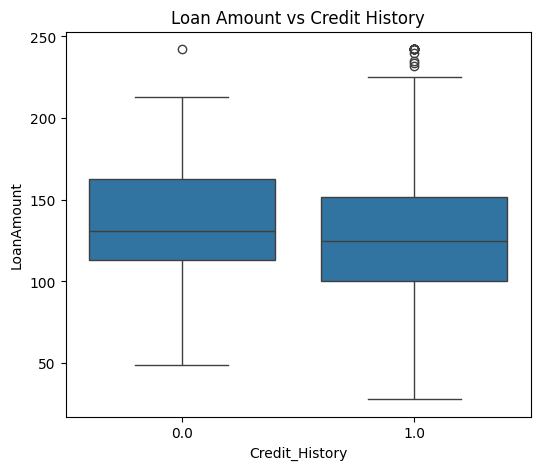

In [62]:
plt.figure(figsize=(6,5))
sns.boxplot(x='Credit_History', y='LoanAmount', data=df1)
plt.title('Loan Amount vs Credit History')
plt.show()


**Good credit linked to higher loan amounts.**

# **Multivariate Analysis**

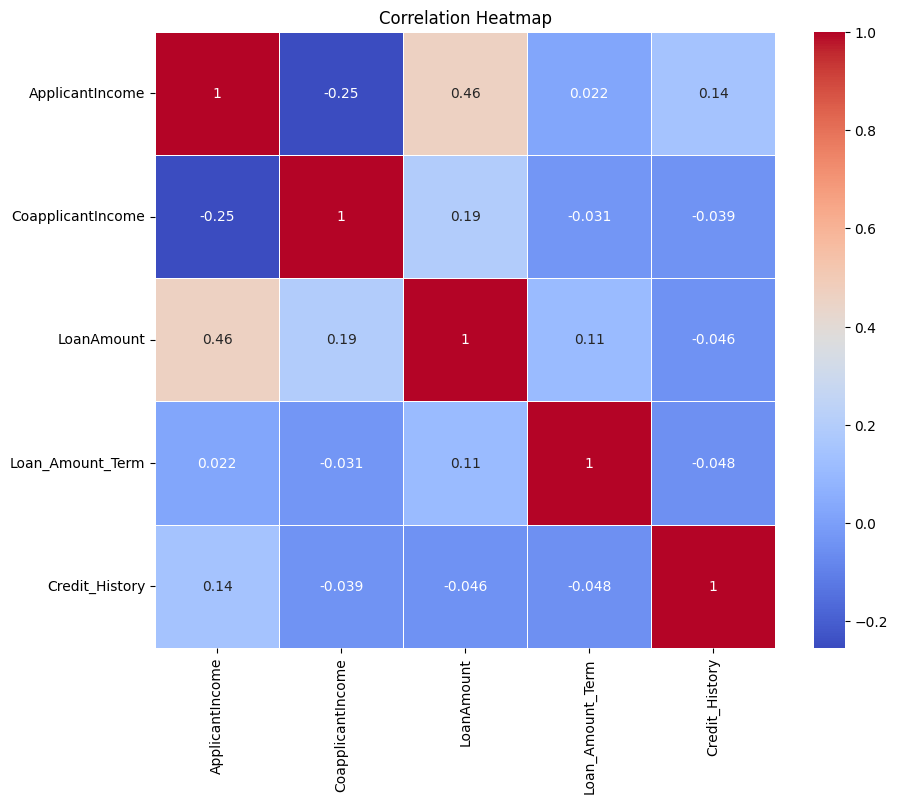

In [63]:
plt.figure(figsize=(10,8))
sns.heatmap(df1[numeric_features].corr(),annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


**Applicant income moderately correlated with loan amount; co‑applicant weaker.**

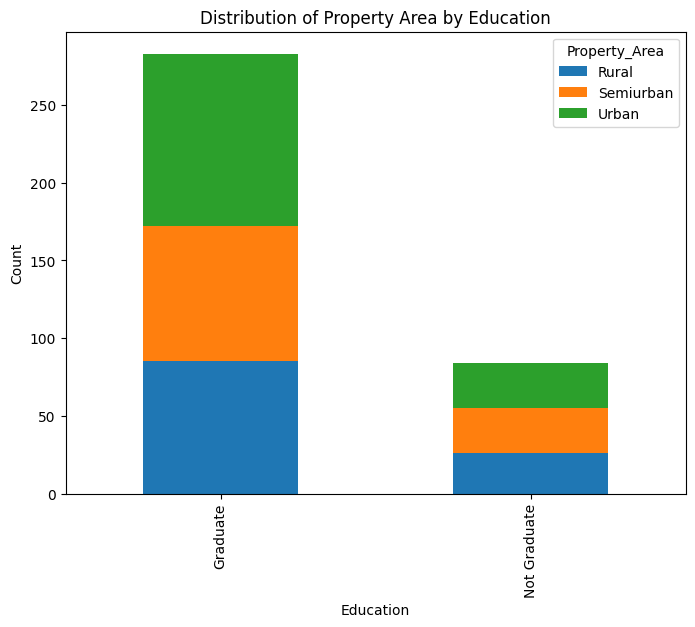

In [64]:
pd.crosstab(df1['Education'], df1['Property_Area']).plot(kind='bar', stacked=True, figsize=(8,6))
plt.title("Distribution of Property Area by Education")
plt.ylabel("Count")
plt.show()

 **Graduates dominate across all property areas.**

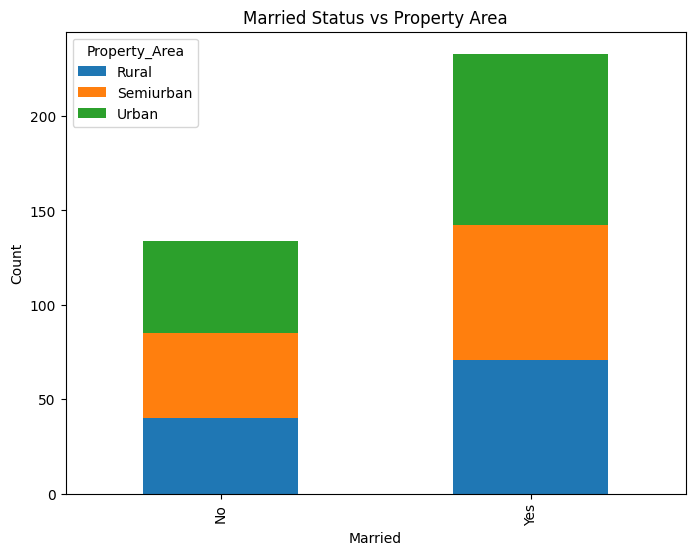

In [65]:
pd.crosstab(df1['Married'], df1['Property_Area']).plot(
    kind='bar', stacked=True, figsize=(8,6))
plt.title('Married Status vs Property Area')
plt.xlabel('Married')
plt.ylabel('Count')
plt.show()



**Married applicants more common in urban/semiurban areas.**

In [66]:
print("""
 Task 1: Data Exploration
- Dataset shows applicant demographics, income, loan details, and property area.
- 367 rows × 12 columns → medium‑sized dataset.
- Mix of categorical (7) and numeric (5) features.
- Some missing values in categorical and numeric columns.
- LoanAmount (5), Loan_Amount_Term (6), Credit_History (29) missing.
- No duplicate records.
- Applicant income highly skewed with large outliers.

 Cleaning
- All categorical missing values handled.
- LoanAmount and Loan_Amount_Term missing values filled.

 Task 2.1: Univariate Analysis
- Most applicants earn ₹2k–₹6k, few extreme outliers.
- Typical loan amounts are between ₹100–₹200, with some extreme values above ₹300.
- Majority male, married, graduates, urban residents.
- Urban (38%), Semiurban (32%), Rural (30%).

 Task 2.2: Bivariate Analysis
- Higher income linked to larger loan requests.
- Applicant income moderately correlated with loan amount.
- Graduates request slightly higher loans.
- Male incomes more spread than female.
- Good credit linked to higher loan amounts.

 Task 2.3: Multivariate Analysis
- Applicant income moderately correlated with loan amount; co‑applicant weaker.
- Graduates dominate across all property areas.
- Married applicants more common in urban/semiurban areas.
""")



 Task 1: Data Exploration
- Dataset shows applicant demographics, income, loan details, and property area.
- 367 rows × 12 columns → medium‑sized dataset.
- Mix of categorical (7) and numeric (5) features.
- Some missing values in categorical and numeric columns.
- LoanAmount (5), Loan_Amount_Term (6), Credit_History (29) missing.
- No duplicate records.
- Applicant income highly skewed with large outliers.

 Cleaning
- All categorical missing values handled.
- LoanAmount and Loan_Amount_Term missing values filled.

 Task 2.1: Univariate Analysis
- Most applicants earn ₹2k–₹6k, few extreme outliers.
- Typical loan amounts are between ₹100–₹200, with some extreme values above ₹300.
- Majority male, married, graduates, urban residents.
- Urban (38%), Semiurban (32%), Rural (30%).

 Task 2.2: Bivariate Analysis
- Higher income linked to larger loan requests.
- Applicant income moderately correlated with loan amount.
- Graduates request slightly higher loans.
- Male incomes more spread th